In [8]:
from encoder_decoder_model import init_dit_bart_models_fixed
from func_utils.pydataloader import SynthDogDataset
from glob import glob 
import os 

In [2]:
def get_synth_images_json_path(data_root= os.path.join('synthdog','outputs'), split='train'):
    ipath = os.path.join(data_root, '*', split, '*.jpg')
    json_path = os.path.join(data_root, '*', split, 'metadata.jsonl')

    return glob(ipath), glob(json_path)

root_path = os.path.join('synthdog', 'outputs_ol')
train_ipath, train_json_metadata = get_synth_images_json_path(data_root=root_path, split='train')
val_ipath, val_json_metadata = get_synth_images_json_path(data_root=root_path, split='validation')
test_ipath, test_json_metadata = get_synth_images_json_path(data_root=root_path, split='test')

processor, text_tokenizer, model = init_dit_bart_models_fixed()

Some weights of BartForCausalLM were not initialized from the model checkpoint at facebook/bart-base and are newly initialized: ['lm_head.weight', 'model.decoder.embed_tokens.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Fetching 1 files: 100%|██████████| 1/1 [00:00<?, ?it/s]


In [3]:
train_json_metadata

['synthdog\\outputs_ol\\SynthDoG_en\\train\\metadata.jsonl',
 'synthdog\\outputs_ol\\SynthDoG_pt\\train\\metadata.jsonl']

In [4]:
tsynth = SynthDogDataset(output_jsons_path=train_json_metadata, image_feature_extractor=processor, 
                         text_tokenizer=text_tokenizer, sample_size=10, read_images_from_supabase=True, split='train')

['SynthDog_en/train/image_0.jpg', 'SynthDog_en/train/image_1.jpg']
Sampled lang counter: {'en': 5, 'pt': 5}
Length of _.images: 10 | Length of _.json_metadata: 32011


'Olympus for killing Python, he'

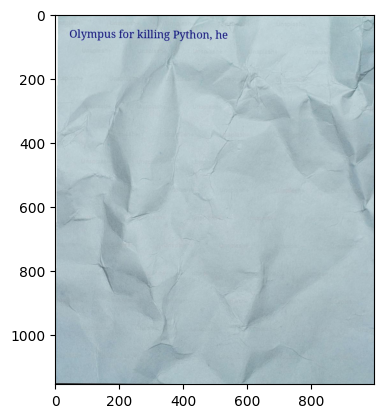

In [7]:
import matplotlib.pyplot as plt 


plt.imshow(tsynth[0]['image'])

tsynth[0]['text']

Moving files from local to server 

In [10]:
train_json_metadata

['synthdog\\outputs_ol\\SynthDoG_en\\train\\metadata.jsonl',
 'synthdog\\outputs_ol\\SynthDoG_pt\\train\\metadata.jsonl']

In [11]:
val_json_metadata

['synthdog\\outputs_ol\\SynthDoG_en\\validation\\metadata.jsonl',
 'synthdog\\outputs_ol\\SynthDoG_pt\\validation\\metadata.jsonl']

In [12]:
test_json_metadata

['synthdog\\outputs_ol\\SynthDoG_en\\test\\metadata.jsonl',
 'synthdog\\outputs_ol\\SynthDoG_pt\\test\\metadata.jsonl']

In [13]:
os.getcwd()

'c:\\Users\\jaabi\\Documents\\comudel\\ocr'

In [35]:
import dotenv
import subprocess
from tqdm import tqdm

dotenv.load_dotenv()

True

In [20]:
sid = os.environ['SERVER_ID']
password = os.environ['SERVER_PASSWORD']

In [26]:
convert_win_to_linux_path = lambda x: '/'.join(x.split('\\')[:-1])

In [32]:
os.path.exists(train_json_metadata[0])

True

In [42]:
for json_path in tqdm(train_json_metadata + val_json_metadata + test_json_metadata, desc= "uploading files to the server"):
# for json_path in tqdm(train_json_metadata, desc= "uploading files to the server"):
    lpath = '/root/ocr/' + convert_win_to_linux_path(json_path)
    command = f"scp {json_path} {sid}:{lpath}"
    res = None
    if os.path.exists(json_path): 
        res = result = subprocess.run(
        ["scp", json_path, f"{sid}:{lpath}"],
        capture_output=True,
        text=True
    )
        print(res.stderr)
        print(res.stdout)
    # print(lpath)
print('DONE')

uploading files to the server:  17%|█▋        | 1/6 [00:05<00:25,  5.01s/it]

uploading files to the server:  33%|███▎      | 2/6 [00:10<00:19,  5.00s/it]

uploading files to the server:  50%|█████     | 3/6 [00:14<00:14,  4.75s/it]

uploading files to the server:  67%|██████▋   | 4/6 [00:18<00:09,  4.62s/it]

uploading files to the server:  83%|████████▎ | 5/6 [00:23<00:04,  4.56s/it]

uploading files to the server: 100%|██████████| 6/6 [00:27<00:00,  4.62s/it]



DONE


In [1]:
import numpy as np 

In [6]:
' '.join(np.random.choice(['cat', 'mat', 'wwer'], 2))

'cat mat'